In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [6]:
# baseline model with dropout and data augmentation on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization
 
# load train and test dataset
def load_dataset():
 # load dataset
 (trainX, trainY), (testX, testY) = cifar10.load_data()
 # one hot encode target values
 trainY = to_categorical(trainY)
 testY = to_categorical(testY)
 return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
 # convert from integers to floats
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 # normalize to range 0-1
 train_norm = train_norm / 255.0
 test_norm = test_norm / 255.0
 # return normalized images
 return train_norm, test_norm
 
# define cnn model
def define_model():
    new_model = Sequential()
    
    model = tf.keras.applications.MobileNet(
        include_top=False,
        weights="imagenet",
        input_tensor=None,
        input_shape=(32,32,3),
        pooling=None,
        classes=10,
       # classifier_activation="softmax",
    #    **kwargs
        )
    
    
    new_model.add(model)
    #3rd conv layer
    new_model.add(tf.keras.layers.Conv2D(32, 3, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.MaxPooling2D(2, padding='same'))
    #4th conv layer
    new_model.add(tf.keras.layers.Conv2D(64, 3, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.MaxPooling2D(2, padding='same'))
    #Flatten Layer
    new_model.add(tf.keras.layers.Flatten())

    new_model.add(tf.keras.layers.Dense(128, kernel_regularizer = tf.keras.regularizers.l2( l=0.01)))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.Dropout(0.2))
    #new_model.add(tf.keras.layers.l2( l=0.01))
    #new_model.add(layers.GlobalAveragePooling2D())
    #output Dense Layer
    new_model.add(tf.keras.layers.Dense(10))
    new_model.add(tf.keras.layers.Activation('softmax'))
    adam = tf.keras.optimizers.Adam(lr=0.001)
    
    opt = SGD(lr=0.001, momentum=0.9)
    new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return new_model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
 # plot loss
    model_trained = history
    accuracy = model_trained.history['accuracy']
    val_accuracy = model_trained.history['val_accuracy']
    loss = model_trained.history['loss']
    val_loss = model_trained.history['val_loss']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Acurácia de treino')
    plt.plot(epochs, val_accuracy, 'g', label='Acurácia de validação')
    plt.title('Acurácia de treino e validação')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'b', label='Perda no treino')
    plt.plot(epochs, val_loss, 'g', label='Perda na validação')
    plt.title('Perda na validação e treino')
    plt.legend()
    plt.show()
 
# run the test harness for evaluating a model
def run_test_harness(epochs, verb):
 # load dataset
 trainX, trainY, testX, testY = load_dataset()
 # prepare pixel data
 trainX, testX = prep_pixels(trainX, testX)
 # define model
 model = define_model()
 # create data generator
 datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 # prepare iterator
 it_train = datagen.flow(trainX, trainY, batch_size=64)
 # fit model
 steps = int(trainX.shape[0] / 64)
 history = model.fit(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=(testX, testY), verbose=verb)
 # evaluate model
 _, acc = model.evaluate(testX, testY, verbose=verb)
 print('> %.3f' % (acc * 100.0))
 # learning curves
 summarize_diagnostics(history)


In [7]:
epochs = 100
verb = 2

In [8]:
trainX, trainY, testX, testY = load_dataset()
 # prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
 # define model
model = define_model()
 # create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 # prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
 # fit model
steps = int(trainX.shape[0] / 64)
history = model.fit(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=(testX, testY), verbose=verb)


17225924/17225924 [==============================] - 2s 0us/step
Epoch 1/100
781/781 - 67s - loss: 2.2570 - accuracy: 0.4757 - val_loss: 1.7040 - val_accuracy: 0.6295 - 67s/epoch - 85ms/step
Epoch 2/100
781/781 - 61s - loss: 1.5814 - accuracy: 0.6442 - val_loss: 1.3308 - val_accuracy: 0.6993 - 61s/epoch - 78ms/step
Epoch 3/100
781/781 - 61s - loss: 1.2994 - accuracy: 0.6951 - val_loss: 1.0948 - val_accuracy: 0.7448 - 61s/epoch - 78ms/step
Epoch 4/100
781/781 - 61s - loss: 1.1045 - accuracy: 0.7263 - val_loss: 0.9572 - val_accuracy: 0.7606 - 61s/epoch - 78ms/step
Epoch 5/100
781/781 - 61s - loss: 0.9733 - accuracy: 0.7432 - val_loss: 0.8334 - val_accuracy: 0.7747 - 61s/epoch - 78ms/step
Epoch 6/100
781/781 - 61s - loss: 0.8682 - accuracy: 0.7587 - val_loss: 0.7680 - val_accuracy: 0.7838 - 61s/epoch - 78ms/step
Epoch 7/100
781/781 - 61s - loss: 0.7960 - accuracy: 0.7706 - val_loss: 0.7119 - val_accuracy: 0.7937 - 61s/epoch - 78ms/step
Epoch 8/100
781/781 - 61s - loss: 0.7333 - accuracy: 

Epoch 63/100
781/781 - 68s - loss: 0.2266 - accuracy: 0.9255 - val_loss: 0.4701 - val_accuracy: 0.8523 - 68s/epoch - 86ms/step
Epoch 64/100
781/781 - 68s - loss: 0.2167 - accuracy: 0.9278 - val_loss: 0.4933 - val_accuracy: 0.8490 - 68s/epoch - 88ms/step
Epoch 65/100
781/781 - 68s - loss: 0.2169 - accuracy: 0.9293 - val_loss: 0.4979 - val_accuracy: 0.8490 - 68s/epoch - 87ms/step
Epoch 66/100
781/781 - 68s - loss: 0.2133 - accuracy: 0.9303 - val_loss: 0.4869 - val_accuracy: 0.8554 - 68s/epoch - 87ms/step
Epoch 67/100
781/781 - 68s - loss: 0.2124 - accuracy: 0.9313 - val_loss: 0.4959 - val_accuracy: 0.8506 - 68s/epoch - 87ms/step
Epoch 68/100
781/781 - 70s - loss: 0.2089 - accuracy: 0.9315 - val_loss: 0.4876 - val_accuracy: 0.8547 - 70s/epoch - 89ms/step
Epoch 69/100
781/781 - 67s - loss: 0.2032 - accuracy: 0.9326 - val_loss: 0.4944 - val_accuracy: 0.8511 - 67s/epoch - 86ms/step
Epoch 70/100
781/781 - 73s - loss: 0.2067 - accuracy: 0.9329 - val_loss: 0.4764 - val_accuracy: 0.8561 - 73s/ep

In [9]:
 # evaluate model
_, acc = model.evaluate(testX, testY, verbose=verb)
print('Acurácia: %.3f' % (acc * 100.0))

313/313 - 4s - loss: 0.5129 - accuracy: 0.8591 - 4s/epoch - 12ms/step
Acurácia: 85.910


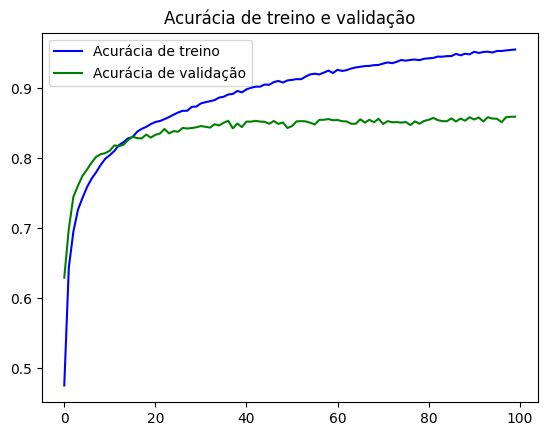

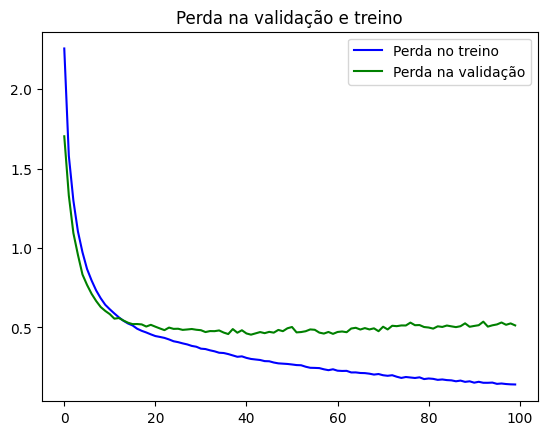

In [10]:
 # learning curves
summarize_diagnostics(history)

In [11]:
model_name = f'cifar-mobileNet-baseline-holdout-{epochs}epochs_all_transfer.npy'
model.save(model_name)

INFO:tensorflow:Assets written to: cifar-mobileNet-baseline-holdout-100epochs_all_transfer.npy\assets


INFO:tensorflow:Assets written to: cifar-mobileNet-baseline-holdout-100epochs_all_transfer.npy\assets


In [12]:
# entry point, run the test harness
#run_test_harness(epochs=100, verb=1)